# Non Linear Regression

### importing_libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Downloading Dataset

In [32]:

#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv


2023-01-23 21:55:37 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


### Reading the data with pandas
- taking a look at the dataset and analyzing data

In [58]:
#1960-2014
df = pd.read_csv("china_gdp.csv")
df.head(10) #View the beginning of the data
#tail is used for Viewing the end of the data

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Data Exploration

In [59]:
#data summary 
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


### Plotting the Dataset

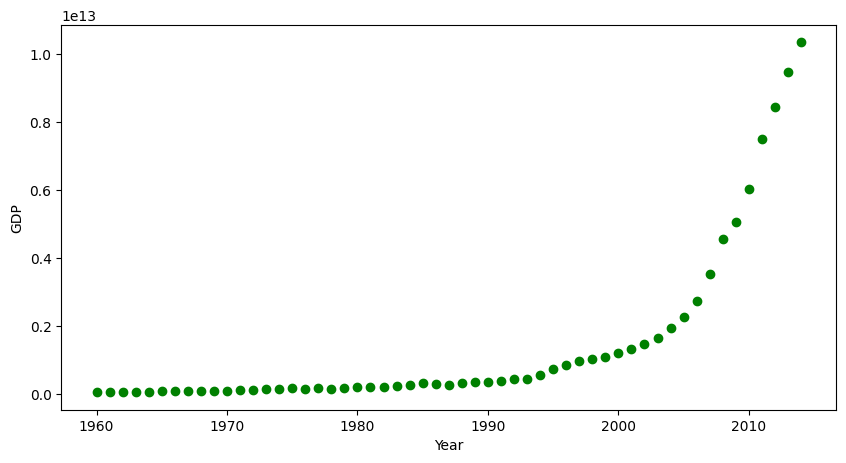

In [60]:
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.figure(figsize=(10,5)) #size plt x,y
plt.plot(x_data, y_data, 'go')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### selecting a model
- According to the plot model above, we can understand that it is similar to Exponential, but with a more detailed and detailed examination, we understand that it is similar to Sigmoidal/Logistic

- the formula is used for the logistic function:

$$ \hat{Y} = \frac1{1+e^{\beta\_1(X-\beta\_2)}}$$


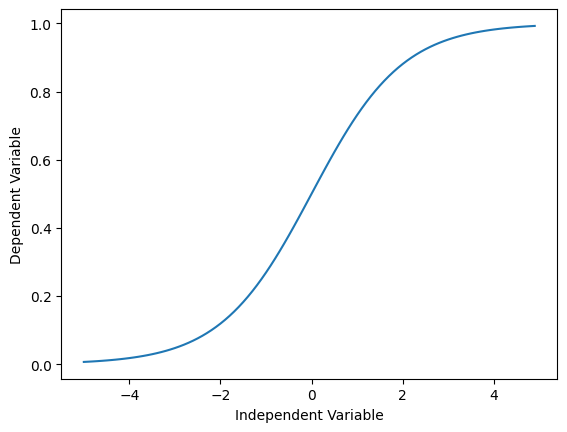

In [62]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Building The Model

- the formula is used for the logistic function:

$$ \hat{Y} = \frac1{1+e^{\beta\_1(X-\beta\_2)}}$$

In [63]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Lets look at a sample sigmoid line that might fit with the data:


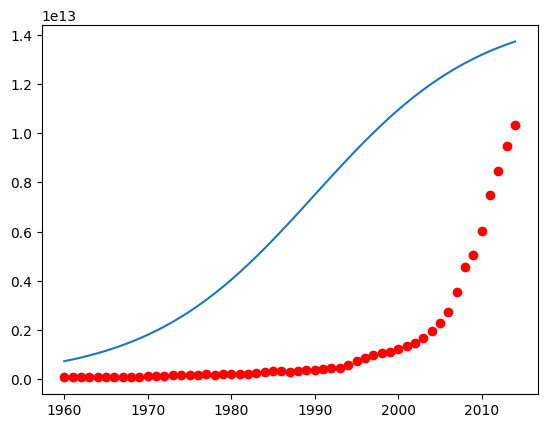

In [73]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, Y_pred*15000000000000.)

### normalizing x and y(obtaining 0-1):

In [83]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [78]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata) #curve_fit will obtain best result

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451709, beta_2 = 0.997207


### drawing final plot
- linspace(): It produces a one-dimensional array between 2 and 5, which has 3 houses the first and last houses are 2 and 5, and the rest is divided

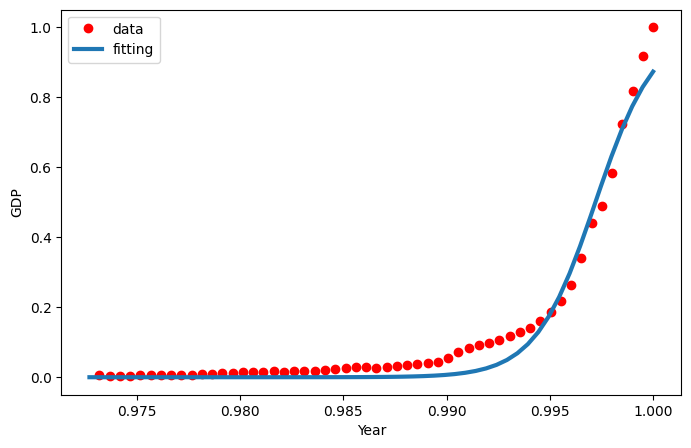

In [85]:
x = np.linspace(1960, 2015, 55)
x = x/max(x) #normalizing 
y = sigmoid(x, *popt) # *popt = popt[0],popt[1]   | * puts two param in func
plt.figure(figsize=(8,5))
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fitting') #linewidth is thickness

plt.legend(loc='best') #it shows data , fitting labels on plt
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Creating train and test dataset 
- 20 % for test and 80 for train

In [184]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.80
train_x = xdata[msk]
train_y = ydata[msk]
test_x = xdata[~msk]
test_y = ydata[~msk]

### building the model using train set

In [185]:
popt, pcov = curve_fit(sigmoid, train_x, train_y)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 726.296403, beta_2 = 0.997162


In [197]:
# predict using test set
predict = sigmoid(test_x, *popt) #y_hat

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(predict , test_y))

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.00
R2-score: 0.94
